In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
image_dimensions = {'height':256, 'width':256, 'channels':3}

In [ ]:
!pip install flask-ngrok
!pip install flask_cors

In [ ]:
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok


/drive/ngrok-ssh
--2022-05-16 13:20:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  2.74MB/s    in 12s     

2022-05-16 13:20:34 (1.12 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip


In [ ]:
!/ngrok authtoken 25n6XDeRAknh3Xb5xupSs1Dkj7Z_56MY7V4hUqhdKqBeDTsn1


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [ ]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
meso = Meso4()
#meso.load('/content/drive/MyDrive/MESO/weights/Meso4_DF')
meso.load('/content/drive/MyDrive/deepfake_database/MESO/weights/Meso4_F2F.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
# dataGenerator = ImageDataGenerator(rescale=1./255)

# # Instantiating generator to feed images through the network
# generator = dataGenerator.flow_from_directory(
#     '/content/NN/data',
#     target_size=(256, 256),
#     batch_size=1,
#     class_mode='binary')

# generator2 = dataGenerator.flow_from_directory(
#     '/content/NN/test',
#     target_size=(256, 256),
#     batch_size=1,
#     class_mode='binary')

# # Re-checking class assignment after removing it
# generator2.class_indices

In [ ]:
# Rendering image X with label y for MesoNet
# X, y = generator.next()
# #print("X", X)
# #print("Y", y)
# X2, Y2 = generator2.next()
# print(X2)
# print(f"Predicted likelihood: {meso.predict(X2)[0][0]:.4f}")
# # Evaluating prediction
# #print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
# print(f"Actual label: {int(Y2[0])}")
# #print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# # Showing image
# plt.imshow(np.squeeze(X2));

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7745-35-201-181-121.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


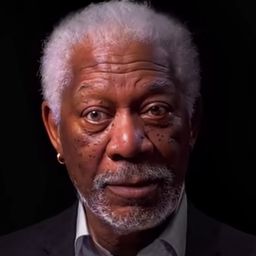

127.0.0.1 - - [16/May/2022 14:13:15] "POST /uploadimage HTTP/1.1" 200 -


(1, 256, 256, 3)
Predicted likelihood: 0.9145


In [ ]:
from flask import Flask
from flask import request
from flask_cors import CORS
from flask_ngrok import run_with_ngrok
import requests
import json
import base64
import io
from PIL import Image
from google.colab import files
import cv2

app=Flask(__name__)
CORS(app)
run_with_ngrok(app)
@app.route('/')
def hello():
    return 'hi'

@app.route('/uploadimage',methods=['POST'])
def receive():
    data=request.get_json(force=True)
    image_data=bytes(data[data.find(",")+1:],encoding="ascii")
    decodedimage=base64.decodebytes(image_data)
    image = Image.open(io.BytesIO(decodedimage))

    #face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/MESO/haarcascade_frontalface_default.xml')
    face_cascade=cv2.CascadeClassifier('/content/drive/MyDrive/deepfake_database/MESO/haarcascade_frontalface_default.xml')
    im=np.array(image)
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.1, 4)
    batch=[]
    for (x, y, w, h) in faces:
      #cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
      new_im=image.crop((x-50,y-50,x+max(w,h)+50,y+max(w,h)+50))
      new_im=new_im.resize((256,256),Image.ANTIALIAS)
      #display(new_im)
      batch.append(new_im)






    # desired_size = 256
    # old_size = image.size  

    # ratio = float(desired_size)/max(old_size)
    # new_size = tuple([int(x*ratio) for x in old_size])
    # image = image.resize(new_size, Image.ANTIALIAS)

    # ratio = float(desired_size)/min(old_size)
    # new_size = tuple([int(x*ratio) for x in old_size])
    # image = image.resize(new_size, Image.ANTIALIAS)
    # new_im=image.crop((image.width/2-128,image.height/2-128,image.width/2+128,image.height/2+128))

    # new_im = Image.new("RGB", (desired_size, desired_size))
    # new_im.paste(image, ((desired_size-new_size[0])//2,(desired_size-new_size[1])//2))
    
    
    # display(new_im)
    # image_np = np.array(new_im)
    # image_np=image_np[:,:,:-1]
    # image_np=image_np[np.newaxis,...]
    # image_np=image_np/255


    if len(batch)==0: return "No face found"
    # for image_np in batch:
    #   image_np=image_np[:,:,:-1]
    #   image_np=image_np[np.newaxis,...]
    #   image_np=image_np/255
    #   print(image_np)
    #   print(image_np.shape)
    #   prediction=meso.predict(image_np)[0][0]
    #   print(f"Predicted likelihood: {prediction:.4f}")

    display(batch[0])
    image_np=np.array(batch[0])
    image_np=image_np[:,:,:-1]
    image_np=image_np[np.newaxis,...]
    image_np=image_np/255
    print(image_np.shape)
    prediction=meso.predict(image_np)[0][0]
    print(f"Predicted likelihood: {prediction:.4f}")


    # Evaluating prediction
    #print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
    #print(f"Actual label: {int(Y2[0])}")
    #print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")







    return str(prediction)


# Prepare image data





app.run()